In [1]:
import numpy as  np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import itertools
from tqdm import tqdm


In [2]:
# Get list of sheets within excel file
def get_sheet_names(file_path):
    xl = pd.ExcelFile(file_path)
    return xl.sheet_names

get_sheet_names(r'Final Master Data.xlsx')

['Sampling Cycles',
 'Meterological Data',
 'PM Data',
 'LAMPS FT Raw Data',
 'LAMPS DN Raw Data',
 'CampSci Reference Panel',
 'Day Fraction',
 'LAMPS Calculated Soiling Loss',
 'Additional Data']

In [3]:
# Read sheet name 'Sampling Cycles'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='Sampling Cycles', skiprows=1)

# Drop Unnamed: 0 column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Keep rows with Cycle values [3,4,5,6,7]
df = df[df['Cycle'].isin([3,4,5,6,7])]

# Print number of ones in column Rainfall
print(df['Rainfall'].value_counts())

# Print first and last Date
print(df['Date'].iloc[0], df['Date'].iloc[-1])

df

Rainfall
0    100
Name: count, dtype: int64
2022-01-10 00:00:00 2022-04-19 00:00:00


,Date,Cycle,Rainfall
40,2022-01-10,3,0
41,2022-01-11,3,0
42,2022-01-12,3,0
43,2022-01-13,3,0
44,2022-01-14,3,0
...,...,...,...
135,2022-04-15,7,0
136,2022-04-16,7,0
137,2022-04-17,7,0
138,2022-04-18,7,0


In [11]:
# Read sheet name 'Meterological Data'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='Meterological Data', skiprows=0)

# Drop column RECORD
df.drop('RECORD', axis=1, inplace=True)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Merge Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'].astype('str'))

# Drop Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Only keep rows with DateTime values between 2022-01-10 and 2022-04-19 (inclusive)
df = df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

# Resample to minute frequency and interpolate missing values
df = df.resample('T', on='DateTime').mean().interpolate()

df = df.iloc[:-1, :]

df

,PTemp_C_Max,AirTC_Avg,RH,WS_ms_Avg,WindDir
DateTime,,,,,
2022-01-10 00:00:00,14.130,14.170,70.200,0.0810,252.700
2022-01-10 00:01:00,14.116,14.150,70.322,0.0742,215.844
2022-01-10 00:02:00,14.102,14.130,70.444,0.0674,178.988
2022-01-10 00:03:00,14.088,14.110,70.566,0.0606,142.132
2022-01-10 00:04:00,14.074,14.090,70.688,0.0538,105.276
...,...,...,...,...,...
2022-04-19 23:55:00,31.690,29.340,41.480,0.7820,156.400
2022-04-19 23:56:00,31.646,29.482,41.006,0.6770,149.340
2022-04-19 23:57:00,31.602,29.624,40.532,0.5720,142.280


In [16]:
# Read sheet name 'PM Data'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='PM Data', skiprows=0)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename column 'yyyy/mm/dd' to 'Date'
df.rename(columns={'yyyy/mm/dd': 'Date'}, inplace=True)

# Rename column 'hh:mm:ss' to 'Time'
df.rename(columns={'hh:mm:ss': 'Time'}, inplace=True)

# Merge Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'].astype('str'))

# Drop Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Only keep rows with DateTime values between 2022-01-10 and 2022-04-19 (inclusive)
df = df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

# Resample to minute frequency and interpolate missing values
df = df.resample('T', on='DateTime').mean().interpolate()

df

,TPM1,TPM2.5,TPM10
DateTime,,,
2022-01-10 00:00:00,42.0,62.0,70.0
2022-01-10 00:01:00,42.0,62.0,67.0
2022-01-10 00:02:00,44.0,61.0,64.0
2022-01-10 00:03:00,45.0,64.0,68.0
2022-01-10 00:04:00,44.0,63.0,67.0
...,...,...,...
2022-04-19 23:55:00,37.0,55.0,61.0
2022-04-19 23:56:00,37.0,55.0,61.0
2022-04-19 23:57:00,33.0,49.0,53.0


In [42]:
# Read sheet name 'LAMPS FT Raw Data'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='LAMPS FT Raw Data', skiprows=0)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Drop column 'millis'
df.drop('millis', axis=1, inplace=True)

# Set 'Date' column as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Merge Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'].astype('str'))

# Drop Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Only keep rows with DateTime values between 2022-01-10 and 2022-04-19 (inclusive)
# df = df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

# Resample to minute frequency and interpolate missing values
# df = df.resample('T', on='DateTime').mean().interpolate()

df

,voltage1,voltage2,DateTime
0,0.02,0.02,2021-11-30 17:53:36
1,0.02,0.02,2021-11-30 17:54:35
2,0.02,0.02,2021-11-30 17:55:34
3,0.02,0.02,2021-11-30 17:56:33
4,0.02,0.02,2021-11-30 17:57:32
...,...,...,...
260852,0.05,0.05,2022-05-29 19:26:56
260853,0.05,0.04,2022-05-29 19:27:55
260854,0.04,0.04,2022-05-29 19:28:54
260855,0.04,0.04,2022-05-29 19:29:53


In [43]:
df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

,voltage1,voltage2,DateTime
46280,0.00,0.00,2022-02-01 00:00:29
46281,0.00,0.00,2022-02-01 00:01:28
46282,0.00,0.00,2022-02-01 00:02:27
46283,0.00,0.00,2022-02-01 00:03:26
46284,0.00,0.00,2022-02-01 00:04:25
...,...,...,...
225080,0.02,0.02,2022-04-05 23:55:13
225081,0.02,0.02,2022-04-05 23:56:12
225082,0.02,0.02,2022-04-05 23:57:11
225083,0.02,0.02,2022-04-05 23:58:10


DateTime
1     36575
12    36473
3     36463
4     34723
5     32718
2     31270
11     9161
10     8776
8      8763
7      8647
6      8645
9      8643
Name: count, dtype: int64


<Axes: xlabel='DateTime'>

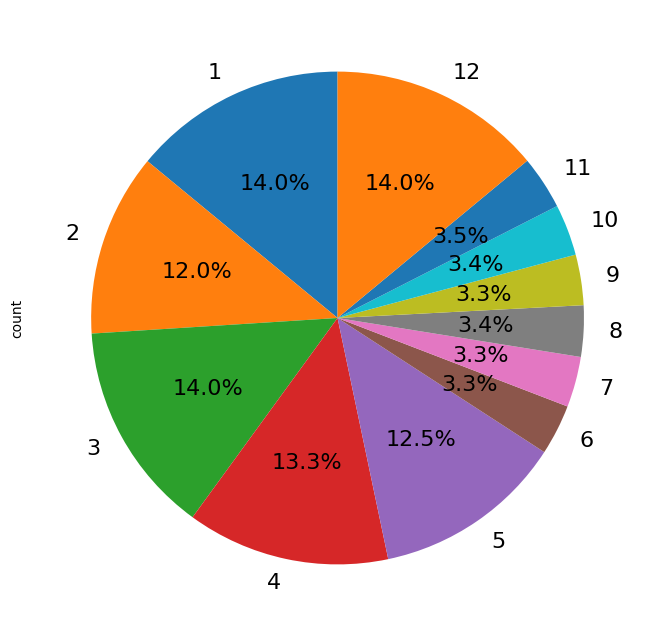

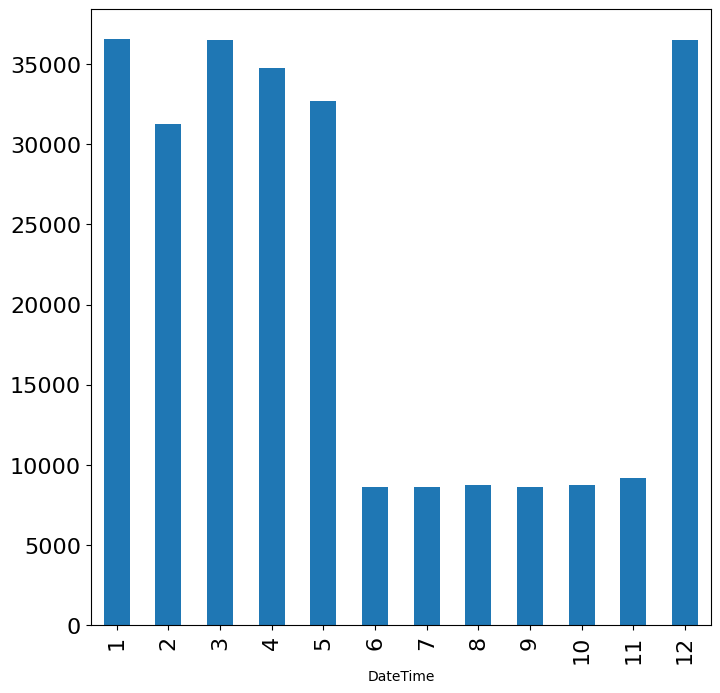

In [44]:
# Print the months in the column 'DateTime' with value_counts()
print(df['DateTime'].dt.month.value_counts())

# Show monthly counts as pie chart
plt.figure()
df['DateTime'].dt.month.value_counts().sort_index().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', startangle=90, fontsize=16)

# Show monthly counts as bar chart with count and months sorted
plt.figure()
df['DateTime'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(8,8), fontsize=16)

In [45]:
# Read sheet name 'LAMPS DN Raw Data'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='LAMPS DN Raw Data', skiprows=0)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Drop column 'millis'
df.drop('millis', axis=1, inplace=True)

# Set 'Date' column as datetime
df['Date'] = pd.to_datetime(df['Date'])

# Merge Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'].astype('str') + ' ' + df['Time'].astype('str'))

# Drop Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Only keep rows with DateTime values between 2022-01-10 and 2022-04-19 (inclusive)
# df = df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

# Resample to minute frequency and interpolate missing values
# df = df.resample('T', on='DateTime').mean().interpolate()

df

,voltage1,voltage2,DateTime
0,0.03,0.02,2021-11-30 17:52:24
1,0.02,0.02,2021-11-30 17:53:25
2,0.01,0.01,2021-11-30 17:54:24
3,0.00,0.00,2021-11-30 17:55:23
4,0.00,0.00,2021-11-30 17:56:22
...,...,...,...
223054,0.05,0.04,2022-05-29 19:26:27
223055,0.05,0.04,2022-05-29 19:27:26
223056,0.04,0.04,2022-05-29 19:28:25
223057,0.04,0.04,2022-05-29 19:29:24


In [46]:
df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

,voltage1,voltage2,DateTime
47215,0.02,0.02,2022-02-01 00:00:35
47216,0.02,0.02,2022-02-01 00:01:34
47217,0.02,0.02,2022-02-01 00:02:33
47218,0.02,0.02,2022-02-01 00:03:32
47219,0.02,0.02,2022-02-01 00:04:31
...,...,...,...
204323,0.02,0.02,2022-04-19 23:56:01
204324,0.02,0.02,2022-04-19 23:57:00
204325,0.02,0.02,2022-04-19 23:57:59
204326,0.02,0.02,2022-04-19 23:58:58


DateTime
12    35137
3     35131
1     35111
2     29803
4     27478
5     16129
11     7697
7      7321
9      7321
6      7320
10     7310
8      7301
Name: count, dtype: int64


<Axes: xlabel='DateTime'>

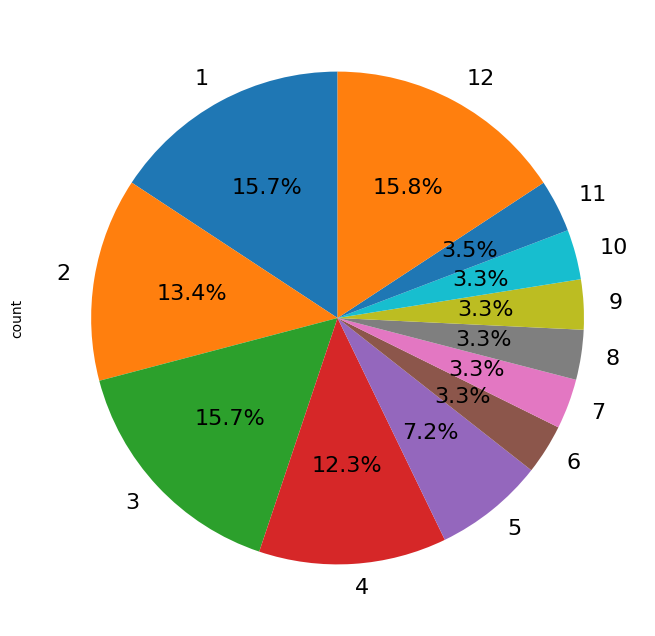

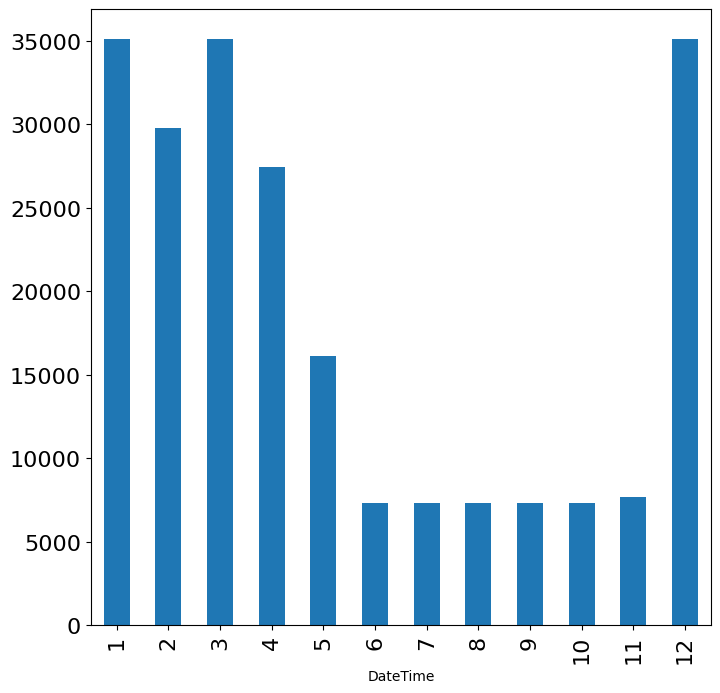

In [47]:
# Print the months in the column 'DateTime' with value_counts()
print(df['DateTime'].dt.month.value_counts())

# Show monthly counts as pie chart
plt.figure()
df['DateTime'].dt.month.value_counts().sort_index().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', startangle=90, fontsize=16)

# Show monthly counts as bar chart with count and months sorted
plt.figure()
df['DateTime'].dt.month.value_counts().sort_index().plot(kind='bar', figsize=(8,8), fontsize=16)

In [58]:
# Read sheet name 'CampSci Reference Panel'
df = pd.read_excel(r'Final Master Data.xlsx', sheet_name='CampSci Reference Panel', skiprows=1)

# Drop row index 1
df.drop(0, axis=0, inplace=True)

# Drop rows with all NaN values
df.dropna(axis=0, how='all', inplace=True)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Rename column 'TIMESTAMP' to 'DateTime'
df.rename(columns={'TIMESTAMP': 'DateTime'}, inplace=True)

# Set 'DateTime' column as datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Set columns 'GeffRef' and 'TempRef' as float
df['GeffRef'] = df['GeffRef'].astype('float')
df['TempRef'] = df['TempRef'].astype('float')

# Set columns 'GeffRef' and 'TempRef' negative values to 0
df['GeffRef'] = df['GeffRef'].clip(lower=0)

# Only keep rows with DateTime values between 2022-01-10 and 2022-04-19 (inclusive)
df = df[(df['DateTime'] >= '2022-01-10T00:00:00') & (df['DateTime'] <= '2022-04-20T00:00:00')]

# Resample to minute frequency and interpolate missing values
df = df.resample('T', on='DateTime').mean().interpolate()

df = df.iloc[:-1, :]

df

,GeffRef,TempRef
DateTime,,
2022-01-10 00:00:00,0.000559,11.0750
2022-01-10 00:01:00,0.001397,11.0625
2022-01-10 00:02:00,0.002235,11.0500
2022-01-10 00:03:00,0.006148,11.0250
2022-01-10 00:04:00,0.000559,10.9900
...,...,...
2022-04-19 23:55:00,0.036891,27.9250
2022-04-19 23:56:00,0.001537,27.9550
2022-04-19 23:57:00,0.085030,27.9800


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144000 entries, 2022-01-10 00:00:00 to 2022-04-19 23:59:00
Freq: T
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   GeffRef  144000 non-null  float64
 1   TempRef  144000 non-null  float64
dtypes: float64(2)
memory usage: 3.3 MB
